<a href="https://colab.research.google.com/github/rzaevnicat/scratch_detection/blob/master/scratch_cnn_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pip install --upgrade tensorflow==2.0.0 &> /dev/null
%pip install gdown patool &> /dev/null

In [3]:
import os
import cv2
import gdown
import patoolib
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.io import imread
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.pooling import MaxPooling2D
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.python.keras.layers.core import Lambda, Flatten, Dense
from tensorflow.python.keras.initializers import glorot_uniform
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.utils import to_categorical

# Please make sure that your tensorflow version is 2.0.0
print(tf.__version__)

2.0.0


Downlaoding file from drive and extracting these files to 'data' folder

In [4]:
%rm -rf data.rar
%rm -rf data/
url = 'https://drive.google.com/uc?id=0B5OUtBsSxu1Bdjh4dk1SeGYtNFU'
output = 'data.rar'
gdown.download(url, output, quiet=False)

%mkdir data
patoolib.extract_archive("data.rar", outdir="data")
%rm -rf data.rar
%mv data/'NEU surface defect database'/* data/
%rm -rf data/'NEU surface defect database'
%rm data/Thumbs.db
FOLDER_IMAGE = "data"

Downloading...
From: https://drive.google.com/uc?id=0B5OUtBsSxu1Bdjh4dk1SeGYtNFU
To: /content/data.rar
50.8MB [00:00, 233MB/s]


patool: Extracting data.rar ...
patool: running /usr/bin/unrar x -- /content/data.rar
patool:     with cwd='data'
patool: ... data.rar extracted to `data'.


In [0]:
IMAGE_SIZE = 64

In [0]:
def label_class(strs=None,number=None):
    if strs=="RS" or number==1:
      # rolled-in scale
      return 1, "RS"
    elif strs=="Pa" or number==2:
      # patches
      return 2, "Pa"
    elif strs=="Cr" or number==3:
      # crazing
      return 3, "Cr"
    elif strs=="PS" or number==4:
      # pitted surface
      return 4, "Ps"
    elif strs=="In" or number==5:
      # inclusion
      return 5, "In"
    elif strs=="Sc" or number==6:
      # scratches
      return 6, "Sc"

In [20]:
def load_images():
    count = 0
    train_image = []
    y = []
    for filename in os.listdir(FOLDER_IMAGE):
        image_path = os.path.join(FOLDER_IMAGE, filename)
        img = image.load_img(image_path, target_size=(IMAGE_SIZE,IMAGE_SIZE,1), color_mode='grayscale')
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        y.append(label_class(filename.split("_")[0])[0])
        count+=1    
        if count%100==0:
          print(count)
    X = np.array(train_image)
    return X, y
X, y  = load_images()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


In [0]:
# convert to categorical
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 1440 samples, validate on 360 samples
Epoch 1/10
1440/1440 [==============================] - 28s 19ms/sample - loss: 1.6570 - accuracy: 0.2965 - val_loss: 1.3246 - val_accuracy: 0.4667
Epoch 2/10
1440/1440 [==============================] - 26s 18ms/sample - loss: 1.1682 - accuracy: 0.5132 - val_loss: 0.8938 - val_accuracy: 0.7222
Epoch 3/10
1440/1440 [==============================] - 26s 18ms/sample - loss: 0.8475 - accuracy: 0.7049 - val_loss: 0.5377 - val_accuracy: 0.8778
Epoch 4/10
1440/1440 [==============================] - 26s 18ms/sample - loss: 0.6245 - accuracy: 0.7694 - val_loss: 0.5643 - val_accuracy: 0.8250
Epoch 5/10
1440/1440 [==============================] - 26s 18ms/sample - loss: 0.5731 - accuracy: 0.8021 - val_loss: 0.3898 - val_accuracy: 0.8806
Epoch 6/10
1440/1440 [==============================] - 27s 18ms/sample - loss: 0.4235 - accuracy: 0.8597 - val_loss: 0.2935 - val_accuracy: 0.8861
Epoch 7/10
1440/1440 [==============================] - 26s 18ms/

In [0]:
prediction = model.predict_classes(X_test)
prediction = to_categorical(prediction)

Actual: (1, 'RS')
Prediction: (1, 'RS')


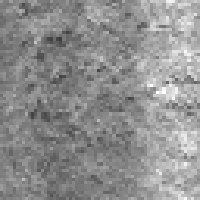

Actual: (1, 'RS')
Prediction: (1, 'RS')


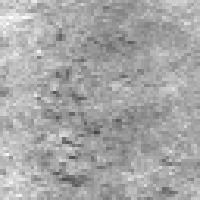

Actual: (3, 'Cr')
Prediction: (3, 'Cr')


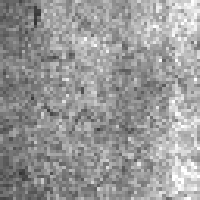

Actual: (2, 'Pa')
Prediction: (2, 'Pa')


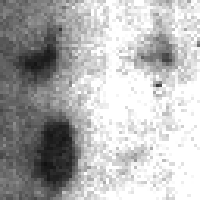

Actual: (3, 'Cr')
Prediction: (3, 'Cr')


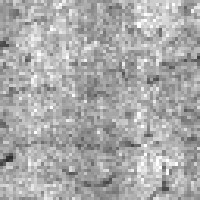

Actual: (5, 'In')
Prediction: (5, 'In')


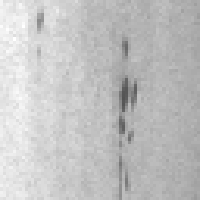

Actual: (1, 'RS')
Prediction: (1, 'RS')


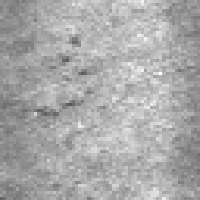

Actual: (6, 'Sc')
Prediction: (6, 'Sc')


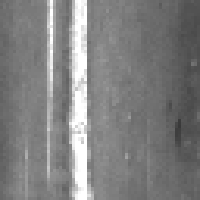

Actual: (5, 'In')
Prediction: (5, 'In')


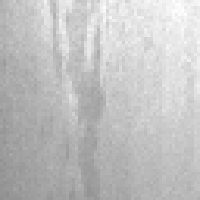

Actual: (3, 'Cr')
Prediction: (3, 'Cr')


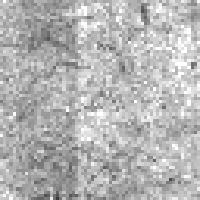

In [23]:
for i in range(0,10):
  n = 130+i
  print("Actual: "+str(label_class(number=np.argmax(y_test[n], axis=-1))))
  print("Prediction: "+str(label_class(number=np.argmax(prediction[n], axis=-1))))
  img = image.array_to_img(X_test[n]*255)

  img = img.resize((200,200),0)
  display(img)